# Project 2: Home Sale Price Analysis, Aimes, Iowa - Zillow

---

# Import Modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

---

# Import Data:

In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
test_df = pd.read_csv('./datasets/test.csv')

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.shape

(2051, 81)

In [6]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
test_df.shape

(879, 80)

In [8]:
df.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
dtype: int64

---

### Analyze columns with null values:

In [9]:
null_dict = dict(df.isnull().sum())

In [10]:
for k, v in null_dict.items():
    if v > 0:
        print(k + ': ', v)
    else:
        pass

Lot Frontage:  330
Alley:  1911
Mas Vnr Type:  22
Mas Vnr Area:  22
Bsmt Qual:  55
Bsmt Cond:  55
Bsmt Exposure:  58
BsmtFin Type 1:  55
BsmtFin SF 1:  1
BsmtFin Type 2:  56
BsmtFin SF 2:  1
Bsmt Unf SF:  1
Total Bsmt SF:  1
Bsmt Full Bath:  2
Bsmt Half Bath:  2
Fireplace Qu:  1000
Garage Type:  113
Garage Yr Blt:  114
Garage Finish:  114
Garage Cars:  1
Garage Area:  1
Garage Qual:  114
Garage Cond:  114
Pool QC:  2042
Fence:  1651
Misc Feature:  1986


---

### Analyze datatypes in the dataframes:

In [11]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
df.dtypes.head()

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [13]:
dtypes_dict = df.dtypes.to_dict()

---

### Analyze columns containing strings:

In [14]:
for k, v in dtypes_dict.items():
    if v == "object":
        print(k + ': ', v)
    else:
        pass

MS Zoning:  object
Street:  object
Alley:  object
Lot Shape:  object
Land Contour:  object
Utilities:  object
Lot Config:  object
Land Slope:  object
Neighborhood:  object
Condition 1:  object
Condition 2:  object
Bldg Type:  object
House Style:  object
Roof Style:  object
Roof Matl:  object
Exterior 1st:  object
Exterior 2nd:  object
Mas Vnr Type:  object
Exter Qual:  object
Exter Cond:  object
Foundation:  object
Bsmt Qual:  object
Bsmt Cond:  object
Bsmt Exposure:  object
BsmtFin Type 1:  object
BsmtFin Type 2:  object
Heating:  object
Heating QC:  object
Central Air:  object
Electrical:  object
Kitchen Qual:  object
Functional:  object
Fireplace Qu:  object
Garage Type:  object
Garage Finish:  object
Garage Qual:  object
Garage Cond:  object
Paved Drive:  object
Pool QC:  object
Fence:  object
Misc Feature:  object
Sale Type:  object


---

### Inspect columns with numerical/non-categorical data:

In [15]:
numerical_cols = df._get_numeric_data()

In [16]:
test_numerical_cols = test_df._get_numeric_data()

In [17]:
numerical_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [18]:
numerical_features = [col for col in numerical_cols if col != 'SalePrice']

In [19]:
test_numerical_features = [col for col in test_numerical_cols if col != 'SalePrice']

In [20]:
df[numerical_features].head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,484.0,0,59,0,0,0,0,0,3,2010


---

## Analyze correlation between non-categorical columns and the 'SalePrice' column:

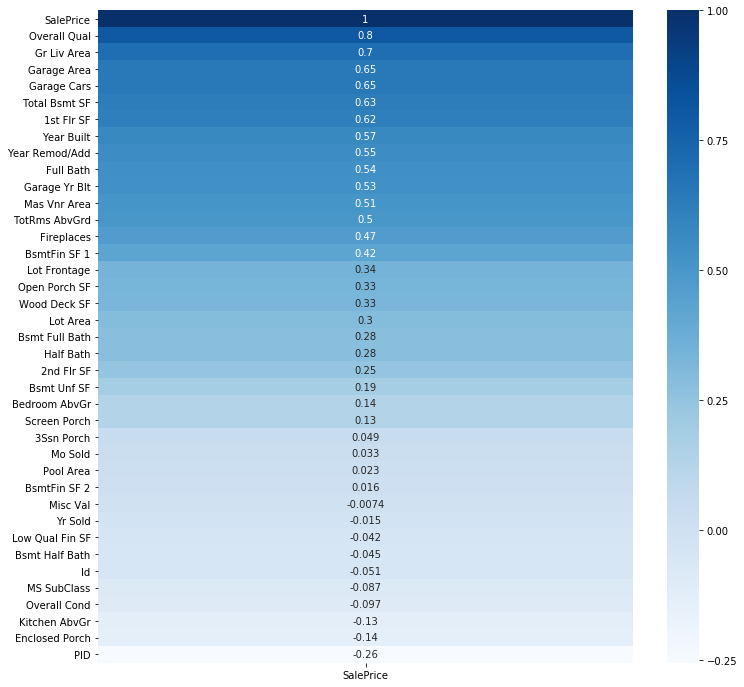

In [21]:
plt.figure(figsize=(12,12))

sns.heatmap(numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='Blues');

---

## Create dictionary of non-categorical columns and their correlations:

In [22]:
corr_dict = numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).to_dict()

In [23]:
corr_dict = corr_dict.pop('SalePrice', None)

---

## Make list of least correlated, non-categorical columns for use later on:

In [24]:
lowest_corr_list = sorted(corr_dict, key=lambda dict_key: abs(corr_dict[dict_key]))

In [25]:
lowest_corr_list[0:50]

['Misc Val',
 'Yr Sold',
 'BsmtFin SF 2',
 'Pool Area',
 'Mo Sold',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 '3Ssn Porch',
 'Id',
 'MS SubClass',
 'Overall Cond',
 'Kitchen AbvGr',
 'Screen Porch',
 'Enclosed Porch',
 'Bedroom AbvGr',
 'Bsmt Unf SF',
 '2nd Flr SF',
 'PID',
 'Half Bath',
 'Bsmt Full Bath',
 'Lot Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Lot Frontage',
 'BsmtFin SF 1',
 'Fireplaces',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Garage Yr Blt',
 'Full Bath',
 'Year Remod/Add',
 'Year Built',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Cars',
 'Garage Area',
 'Gr Liv Area',
 'Overall Qual',
 'SalePrice']

---

### Scatter Plots of Above Correlations in same order:

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


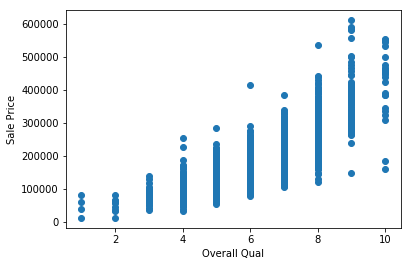

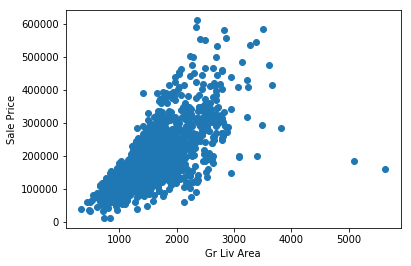

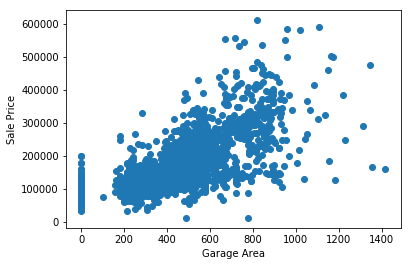

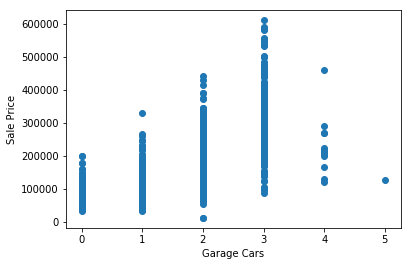

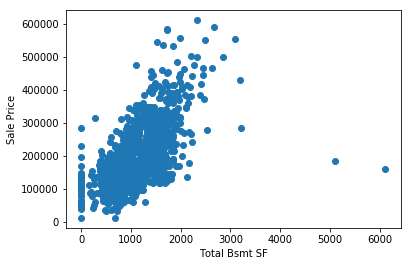

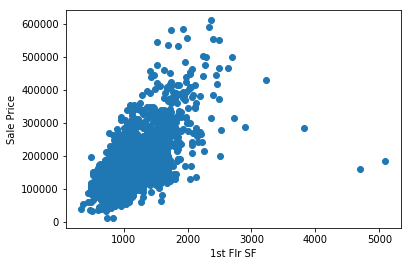

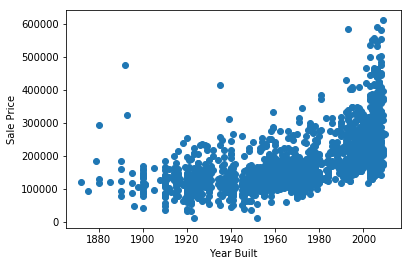

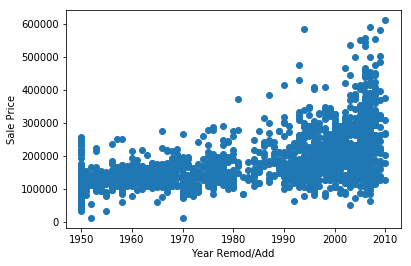

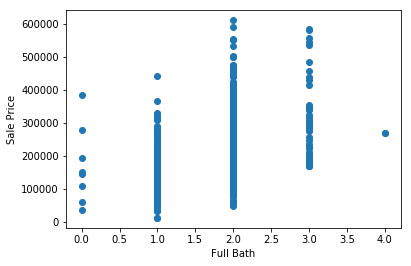

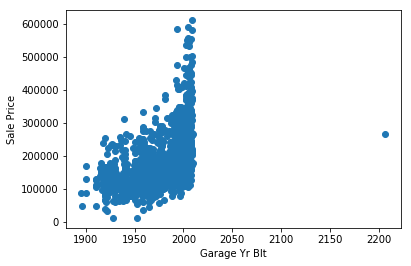

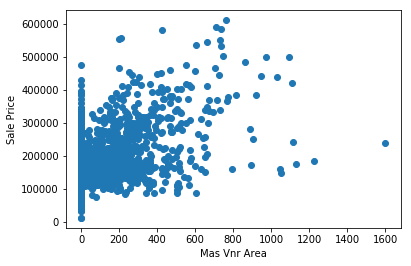

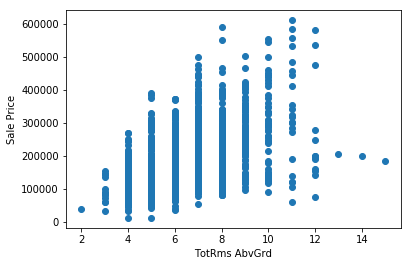

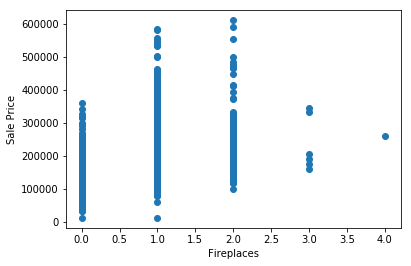

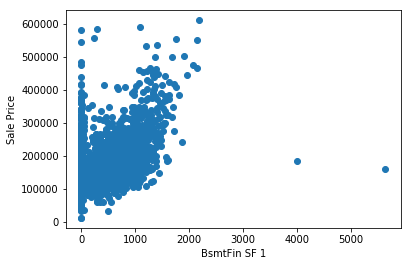

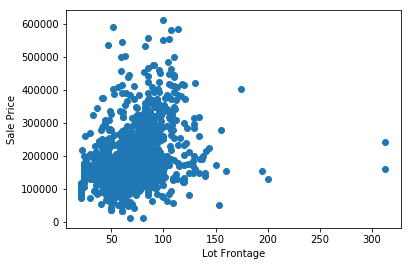

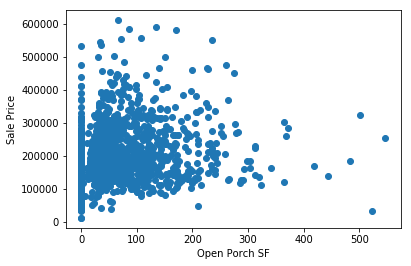

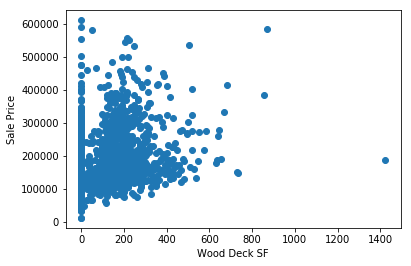

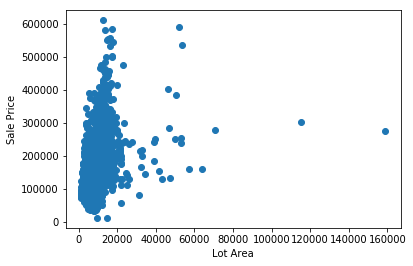

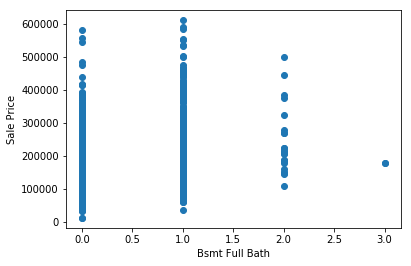

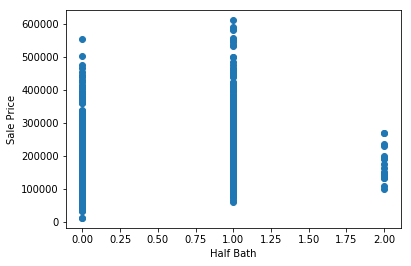

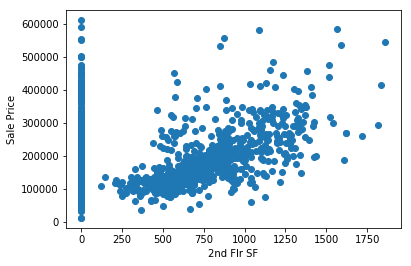

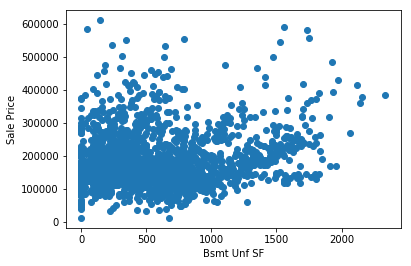

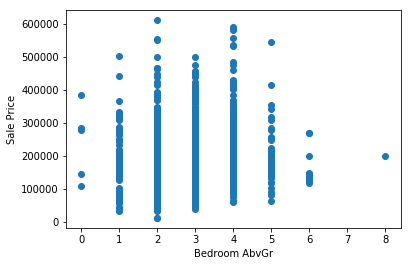

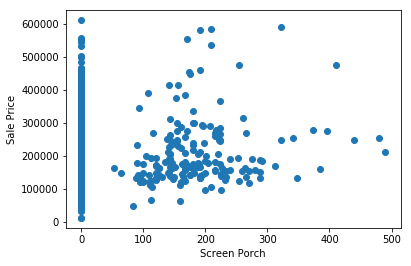

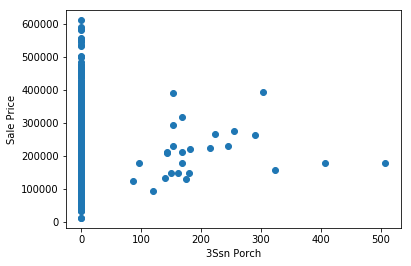

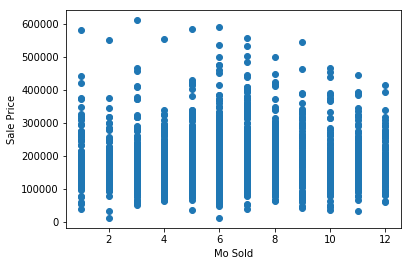

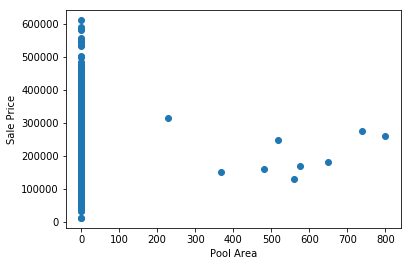

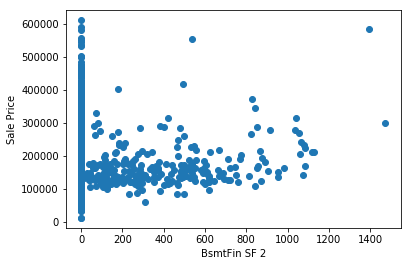

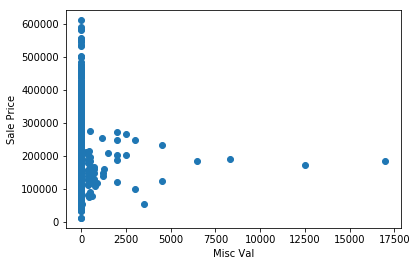

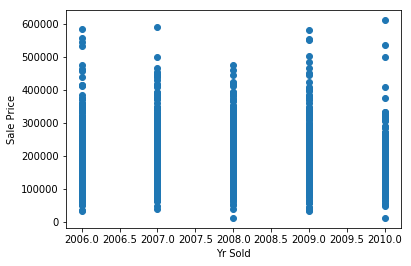

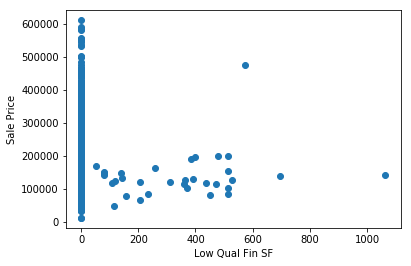

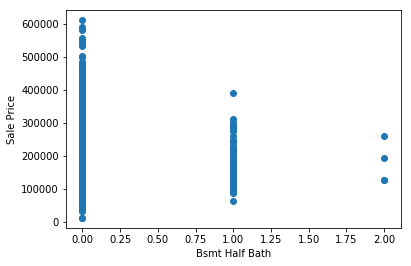

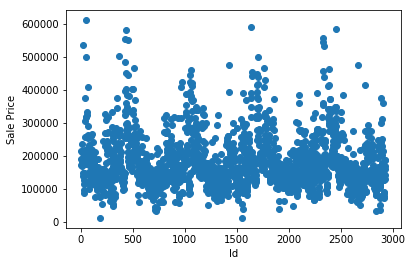

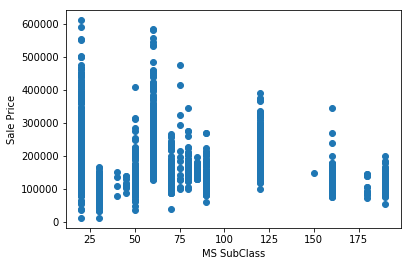

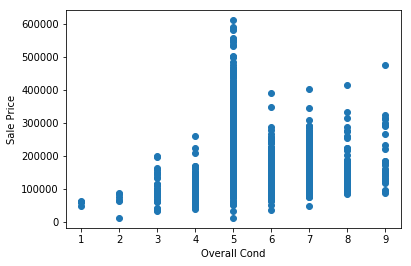

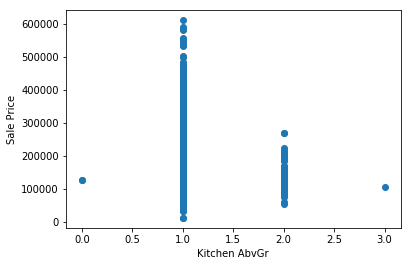

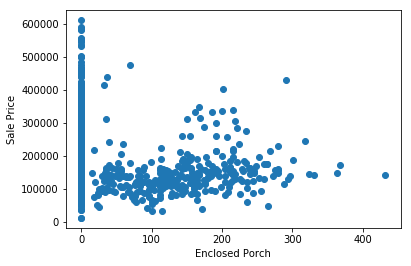

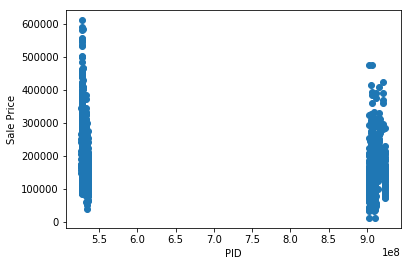

In [26]:
for col in list(numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).index.values):
    
    if col != 'SalePrice':
        plt.figure()
        plt.ylabel('Sale Price')
        plt.xlabel(col)
        plt.scatter(numerical_cols[col], numerical_cols['SalePrice']);
    else:
        pass

## I noticed an outlier in the 'Garage Yr Blt' column - I will investigate below:

In [27]:
df[df['Garage Yr Blt'] > 2100]['Garage Yr Blt']

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [28]:
df['Year Built'][1699]

2006

** Given that the Year that the Garage was built for this house was entered incorrectly, ** as it cannot possibly be 2207, I'm going to go ahead and change it. The year that the ** house was built is listed as 2006 .**  It seems like the year the garage was built ** should have been 2007 and not 2207, ** which makes sense given that the year the house was built was only a year prior and the garage can be the last completed part of the construction process.

In [29]:
df['Garage Yr Blt'][1699] = 2007

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['Garage Yr Blt'][1699]

2007.0

### Confirm change took place with scatter plot:

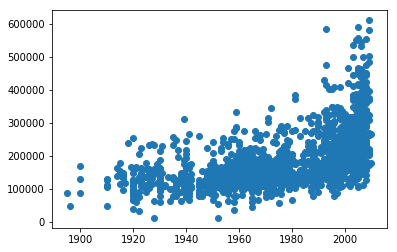

In [31]:
plt.scatter(numerical_cols['Garage Yr Blt'], numerical_cols['SalePrice']);

---

# Analyze distribution of Home Sale Prices for listings in the 'Train' DF:

## Histogram

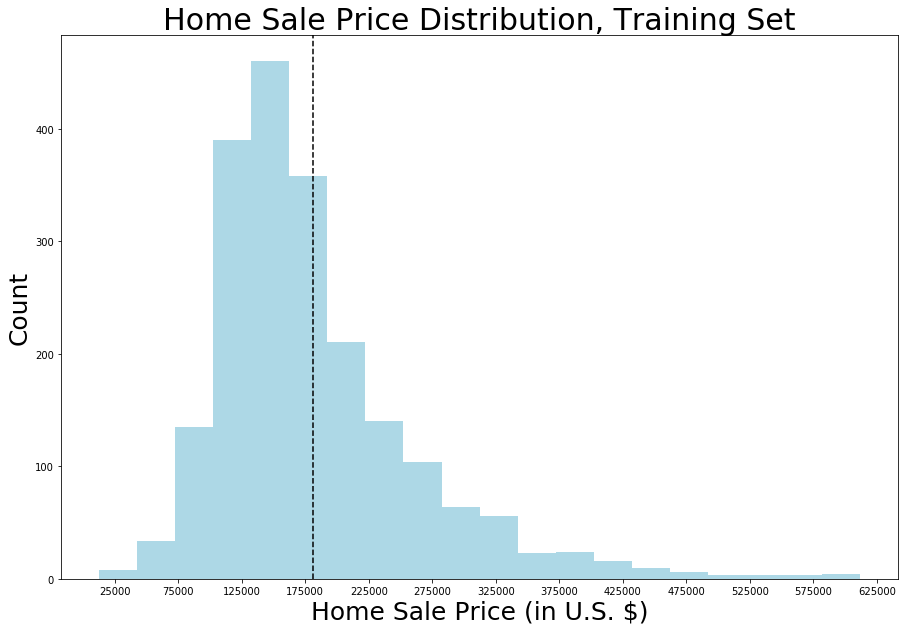

In [32]:
plt.figure(figsize=(15,10))

plt.title("Home Sale Price Distribution, Training Set", fontsize=30)

plt.xlabel("Home Sale Price (in U.S. $)", fontsize=25)
plt.ylabel("Count", fontsize=25)

plt.xticks(range(25000, 625001, 50000))

plt.hist(df['SalePrice'], bins=20, color='lightblue')
plt.axvline(np.mean(df['SalePrice']), color='k', linestyle='dashed');

## Boxplot

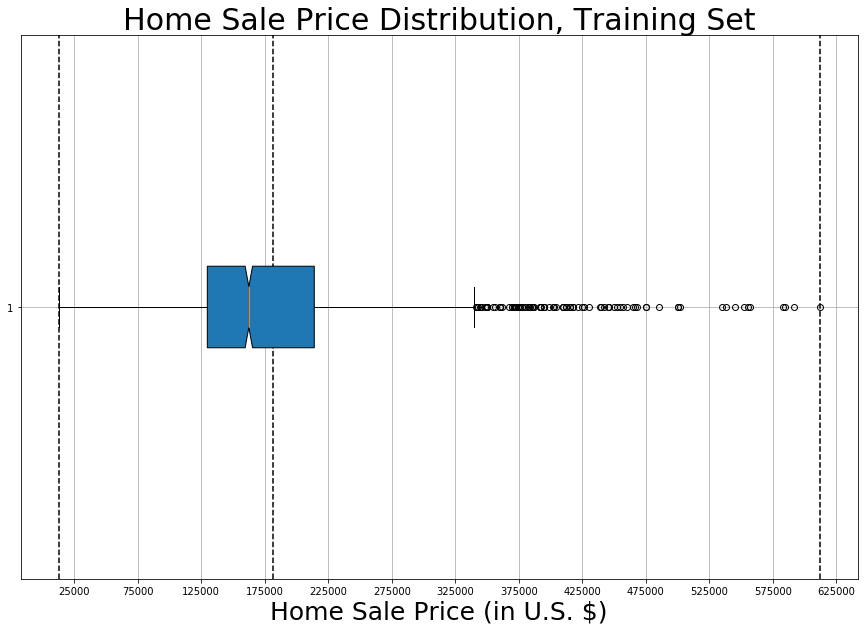

In [33]:
plt.figure(figsize=(15, 10))
plt.grid()

plt.title("Home Sale Price Distribution, Training Set", fontsize=30)

plt.xlabel("Home Sale Price (in U.S. $)", fontsize=25)

plt.axvline(np.mean(df['SalePrice']), color='k', linestyle='dashed')
plt.axvline(np.max(df['SalePrice']), color='k', linestyle='dashed')
plt.axvline(np.min(df['SalePrice']), color='k', linestyle='dashed')

plt.xticks(range(25000, 625001, 50000))

plt.boxplot(df['SalePrice'], vert=False, patch_artist=True, notch=True);

---

## Can I conquer the Problem Statement with the given data?

** Provided the Problem Statement (mentioned above) and the two datasets (train and test), I do believe it is achievable to build a decently accurate/useful predictive model for Home Sale Prices. ** The train dataset does have some null values, especially in peculiar home features like Fireplace Quality, which can somewhat *** disrupt *** the data and the model built around it, but not enough null values to render the dataset useless or even weak.  Once again, I do believe we can build a useful model with the given data, but to what degree is yet to be seen.  We will build models, and test the predictions against unseen data hosted by Kaggle by submitting our predictions.  Tweaks will be made to the models in hopes of improving them, from removing/adding feautres or columns from the inputs, or X's, of the model, to adding Polynomial Feature columns, to changing the parameters of the regression models, like the alpha level.  The model that produces the lowest RMSE on Kaggle's holdout data will be the winning model.

---

# Turn Categorical columns into dummies

In [34]:
dummie_cols = pd.get_dummies(df)

In [35]:
test_dummie_cols = pd.get_dummies(test_df)

In [36]:
dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
test_dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


** There is a discrepancy between the dummie columns that were created/added to the training df ('df') and the testing df ('test_df') **, since some categorical values were in one df and not the other.  I will have to go through each df, find which categorical values show up/don't show up in each, and fill those values in to the df that is missing them as 0, or not having that categorical trait.

In [38]:
list_in_train_not_in_test = list(set(dummie_cols.columns) - set(test_dummie_cols.columns))

In [39]:
for col in list_in_train_not_in_test:
    test_dummie_cols[col] = 0

In [40]:
test_dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Pool QC_Fa,Condition 2_RRAe,Electrical_Mix,Exterior 1st_Stone,Neighborhood_GrnHill,Bsmt Cond_Ex,Heating_Wall,Exterior 1st_CBlock,Functional_Sev,Pool QC_Gd
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
list_in_test_not_in_train = list(set(test_dummie_cols.columns) - set(dummie_cols.columns))

In [42]:
for col in list_in_test_not_in_train:
    dummie_cols[col] = 0

In [43]:
dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


---

# Ensure both df contain same dummie columns:

#### Train DF

In [44]:
list_of_dummie_cols = list(dummie_cols.columns)

In [45]:
list_of_df_cols = list(df.columns)

In [46]:
intersection = list(set(list_of_df_cols) & set(list_of_dummie_cols))

In [47]:
df.drop(intersection, axis=1, inplace=True)

#### Test Set

In [48]:
test_list_of_dummie_cols = list(test_dummie_cols.columns)

In [49]:
test_list_of_df_cols = list(test_df.columns)

In [50]:
test_intersection = list(set(test_list_of_df_cols) & set(test_list_of_dummie_cols))

In [51]:
test_df.drop(test_intersection, axis=1, inplace=True)

---

# Merge Dummie DF with original DF

#### Train DF

In [52]:
df = df.merge(dummie_cols, left_index=True, right_index=True)

In [53]:
df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,1,0,0,0,0,0,0,0,0,0
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,1,0,0,0,0,0,0,0,0,0
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1,0,0,0,0,0,0,0,0,0
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,1,0,0,0,0,0,0,0,0,0
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,1,0,0,0,0,0,0,0,0,0


#### Test DF

In [54]:
test_df = test_df.merge(test_dummie_cols, left_index=True, right_index=True)

In [55]:
test_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Pool QC_Fa,Condition 2_RRAe,Electrical_Mix,Exterior 1st_Stone,Neighborhood_GrnHill,Bsmt Cond_Ex,Heating_Wall,Exterior 1st_CBlock,Functional_Sev,Pool QC_Gd
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,0,0,0,0,0,0,0,0,0,0
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,0,0,0,0,0,0,0,0,0,0
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,0,0,0,0,0
3,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,0,0,0,0,0,0,0,0,0,0
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,0,0,0,0,0,0,0,0,0


---

### Ensure dataframes' columns are arranged in the same order:

In [56]:
list(df.columns) == list(test_df.columns)

False

In [57]:
sorted(list(df.columns)) == sorted(list(test_df.columns))

True

### Rearrange columns in 'test_df' to equal the column arrangement in 'df':

In [58]:
test_df = test_df[list(df.columns)]

In [59]:
list(df.columns) == list(test_df.columns)

True

---

## Drop Categorical Columns

#### Train DF

In [60]:
cols_list = list(df.columns)

In [61]:
numerical_cols = df._get_numeric_data()

In [62]:
numerical_cols_list = list(numerical_cols.columns)

In [63]:
cat_cols_list = list(set(cols_list) - set(numerical_cols_list))

In [64]:
df_without_cat_cols = df.drop(cat_cols_list, axis=1)

In [65]:
df_without_cat_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


#### Test DF

In [66]:
test_cols_list = list(test_df.columns)

In [67]:
test_numerical_cols = test_df._get_numeric_data()

In [68]:
test_numerical_cols_list = list(test_numerical_cols.columns)

In [69]:
test_cat_cols_list = list(set(test_cols_list) - set(test_numerical_cols_list))

In [70]:
test_df_without_cat_cols = test_df.drop(test_cat_cols_list, axis=1)

In [71]:
test_df_without_cat_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,1,0,0,0,0,0,0,0,0,0
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,1,0,0,0,0,0,0,0,0,0


---

## Quick look at Summary Statistics

In [72]:
df_without_cat_cols.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,0.868357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,0.338185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### I will turn pd.DataFrame(df_without_cat_cols['SalePrice'].describe()) into a DataFrame for aesthetic purposes only.

In [73]:
saleprice_df = pd.DataFrame(df_without_cat_cols['SalePrice'].describe())

In [74]:
saleprice_df

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


In [75]:
test_df_without_cat_cols.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,...,0.858931,0.001138,0.001138,0.001138,0.001138,0.001138,0.001138,0.001138,0.001138,0.001138
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,...,0.348291,0.033729,0.033729,0.033729,0.033729,0.033729,0.033729,0.033729,0.033729,0.033729
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## Deal with Null Values

#### Train DF

In [76]:
df_without_cat_cols.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
Lot Frontage    330
Lot Area          0
dtype: int64

In [77]:
df_without_cat_cols.replace(np.nan, 0, inplace=True)

In [78]:
df_without_cat_cols.isnull().sum().head()

Id              0
PID             0
MS SubClass     0
Lot Frontage    0
Lot Area        0
dtype: int64

#### Test DF

In [79]:
test_df_without_cat_cols.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
Lot Frontage    160
Lot Area          0
dtype: int64

In [80]:
test_df_without_cat_cols.replace(np.nan, 0, inplace=True)

In [81]:
test_df_without_cat_cols.isnull().sum().head()

Id              0
PID             0
MS SubClass     0
Lot Frontage    0
Lot Area        0
dtype: int64

### Ensure columns are the same between both 'df' and 'test_df':

In [82]:
list(df_without_cat_cols.columns) == list(test_df_without_cat_cols)

True

---

# Feature Engineering

---

In [83]:
features = list(df_without_cat_cols.columns)

features.remove('SalePrice')

In [84]:
test_features = list(test_df_without_cat_cols.columns)

#I know I should not have to remove the 'SalePrice' column from the test set, but I am going to anyways, for the sake
# of being thorough and certain.

test_features.remove('SalePrice')

In [85]:
X = df_without_cat_cols[features]
y = df_without_cat_cols['SalePrice']

In [86]:
X_2 = test_df_without_cat_cols[test_features]

### Ensure features are the same between both X and X_2:

In [87]:
list(X) == list(X_2)

True

---

## Create/Add PolynomialFeatures columns:

In [88]:
poly = PolynomialFeatures(include_bias=False, degree=2)

In [89]:
X_poly = poly.fit_transform(X)

In [90]:
test_X_poly = poly.fit_transform(X_2)

---

### Train-Test Split the 'Train' df

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

---

### Instantiate StandardScaler, fit, and transform

In [92]:
ss = StandardScaler()

In [93]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
X_train_sc = ss.transform(X_train)
test_X_poly_sc = ss.transform(test_X_poly)


## Instantiate Regression Models

In [95]:
lr = LinearRegression()
ridge = Ridge()
ridgecv = RidgeCV()
lasso = Lasso()
lassocv = LassoCV()
en = ElasticNetCV()

---

## Create function to return predictions and convert them into csv for Kaggle submission:

In [96]:
def predics_to_csv(file_name_as_string, model, X):
    predictions = model.predict(X)
    predictions = pd.DataFrame(predictions)
    predictions.columns = ['SalePrice']
    predictions['Id'] = test_df_without_cat_cols['Id']
    predictions = predictions[['Id','SalePrice']]
    predictions.to_csv(file_name_as_string, index=False, sep=",")
    

---

## Create function to return performance metrics for model:

In [97]:
def regression_metrics(X, y, model):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    model = model.fit(X, y)
    y_hat = model.predict(X)

    r_squared = model.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

---

## Identify Baseline Prediction/Score

### Find average Y / Home Sale Price:

The **Baseline Prediction** that we will be using will be the **average of the Sale Price** for the listings in the **train.csv** file.  As can be seen below, the **average of the Sale Price** for the listings in the train.csv file is **181469.70**.  Given that our metric of success for our model is the RMSE returned when comparing our model's predictions against the true Sale Price of the unseen data, we went ahead and submitted our Baseline predictions into Kaggle to record what RMSE it produced, which was 83689.75.

We can use the **Baseline Predictions' RMSE of 83689.75** as a referential metric for the regression models we were able to create.  We aim to minimize the RMSE of our predictions as much as possible, for the smaller our predictions' RMSE, the better our model.

In [98]:
np.mean(y)

181469.70160897123

In [99]:
predics_baseline = pd.DataFrame()

In [100]:
predics_baseline['Id'] = test_df_without_cat_cols['Id']

In [101]:
predics_baseline['SalePrice'] = np.mean(y)

In [102]:
predics_baseline.head()

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609


In [103]:
#predics_baseline.to_csv("predics_baseline.csv", index=False, sep=",")

**Kaggle RMSE Score: **  83,689.75

---

# Model Building

---

## LinearRegression

In [104]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
#predics_to_csv('my_first_submission.csv', lr, test_X_poly_sc)

In [106]:
lr.score(X_test, y_test)

-28.791379563152624

In [107]:
regression_metrics(X_train, y_train, lr)

R-squared: 0.9857361062048924
Adjusted R-squared: 1.0004992508998036
Mean Squared Error: 90212284.81926513
Root Mean Squared Error: 9498.014783062044
Mean Absolute Error: 7094.723589526688
Median Absolute Error: 5434.839189249091


**Kaggle RMSE Score: **    47,038.67

---

## LassoCV

In [108]:
lassocv.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [109]:
#predics_to_csv('predics_1.csv', lasso, test_X_poly_sc)

In [110]:
lassocv.alpha_

870.733275555782

In [111]:
regression_metrics(X_train_sc, y_train, lassocv)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


R-squared: 0.9691901716032071
Adjusted R-squared: 1.001078375566367
Mean Squared Error: 194857382.87798187
Root Mean Squared Error: 13959.132597621598
Mean Absolute Error: 10141.171329069613
Median Absolute Error: 7491.799956222676


**Kaggle RMSE Score: **    26,023.70

---

## RidgeCV

In [112]:
ridgecv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [113]:
#predics_to_csv('predics_2.csv', ridgecv, test_X_poly_sc)

In [114]:
regression_metrics(X_train_sc, y_train, ridgecv)

R-squared: 0.999958198993746
Adjusted R-squared: 1.0000014630780547
Mean Squared Error: 264371.30955100205
Root Mean Squared Error: 514.1705063021429
Mean Absolute Error: 168.9917600338751
Median Absolute Error: 27.486162986257114


**Kaggle RMSE Score: **    27,843.24

---

### ElasticNetCV

In [115]:
en.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [116]:
#predics_to_csv('predics_3.csv', en, test_X_poly_sc)

In [117]:
regression_metrics(X_train_sc, y_train, en)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


R-squared: 0.9176677654315145
Adjusted R-squared: 1.0028817125801417
Mean Squared Error: 520711882.8412926
Root Mean Squared Error: 22819.11222728204
Mean Absolute Error: 14917.85906580322
Median Absolute Error: 10210.650880306246


**Kaggle RMSE Score: **    34,664.66

---

### Up to this point, the model that produces the lowest RMSE on the unseen data provided by Kaggle is the LassoCV model found a few cells above.  From here, I am going to play with the alpha levels to see if I can strengthen the model further.

---

## Lasso

In [118]:
lasso = Lasso(alpha=900)

In [119]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=900, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
#predics_to_csv('predics_4.csv', lasso, test_X_poly_sc)

In [121]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9684604439402558
Adjusted R-squared: 1.0011039167823612
Mean Squared Error: 199472560.24233085
Root Mean Squared Error: 14123.475501530453
Mean Absolute Error: 10245.448773807433
Median Absolute Error: 7519.61969631855


**Kaggle RMSE Score: **    25,990.26

---

### Increasing my alpha from ~ 870.73 to 900 decreased my RMSE.  The model seems to have been overfit previously.  I will continue increasing alpha until it no longer improves my RMSE.

---

In [122]:
lasso = Lasso(alpha=1000)

In [123]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
#predics_to_csv('predics_5.csv', lasso, test_X_poly_sc)

In [125]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.966078638502853
Adjusted R-squared: 1.0011872824134338
Mean Squared Error: 214536336.90734994
Root Mean Squared Error: 14647.058984907173
Mean Absolute Error: 10572.326700535315
Median Absolute Error: 7723.348905236795


**Kaggle RMSE Score: **    25,890.80

---

### Increasing my alpha from 900 to 1000 decreased my RMSE further.  The model seems to have been overfit previously.  I will continue increasing alpha until it no longer improves my RMSE.

---

In [126]:
lasso = Lasso(alpha=1200)

In [127]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1200, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
#predics_to_csv('predics_6.csv', lasso, test_X_poly_sc)

In [129]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9617851140470176
Adjusted R-squared: 1.001337560169192
Mean Squared Error: 241690819.17229375
Root Mean Squared Error: 15546.408561860639
Mean Absolute Error: 11113.591966944627
Median Absolute Error: 8064.579255893448


**Kaggle RMSE Score: **    25,940.54

---

### Increasing my alpha from 1000 to 1200 increased my RMSE.  I will investigate if there is a better alpha between 1000 and 1200 that provides a lower RMSE than an alpha of 1000, which has produced the smallest RMSE as of it.

---

In [130]:
lasso = Lasso(alpha=1100)

In [131]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
#predics_to_csv('predics_7.csv', lasso, test_X_poly_sc)

In [133]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9638675530774051
Adjusted R-squared: 1.0012646726691419
Mean Squared Error: 228520391.40365028
Root Mean Squared Error: 15116.89093046749
Mean Absolute Error: 10855.506336811215
Median Absolute Error: 7850.686211018212


**Kaggle RMSE Score: **    25,885.79

---

### Decreasing my alpha from 1200 to 1100 decreased my RMSE, but only slightly, leading me to believe that an alpha of 1100 results in just about the lowest RMSE (all other things equal).  I will continue by changing other parameters, like max_iter.

---

In [134]:
lasso = Lasso(alpha=1100, max_iter=2500)

In [135]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1100, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [136]:
#predics_to_csv('predics_8.csv', lasso, test_X_poly_sc)

In [137]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9638675530774051
Adjusted R-squared: 1.0012646726691419
Mean Squared Error: 228520391.40365028
Root Mean Squared Error: 15116.89093046749
Mean Absolute Error: 10855.506336811215
Median Absolute Error: 7850.686211018212


**Kaggle RMSE Score: **    25,885.79

---

### Increasing my max_iter from 1000 to 2500 did not change my RMSE.

---

In [138]:
lasso = Lasso(alpha=1120, max_iter=2500)

In [139]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1120, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
#predics_to_csv('predics_9.csv', lasso, test_X_poly_sc)

In [141]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.963431086539813
Adjusted R-squared: 1.0012799494452282
Mean Squared Error: 231280832.84894767
Root Mean Squared Error: 15207.920069784286
Mean Absolute Error: 10910.151851172524
Median Absolute Error: 7894.628070155799


**Kaggle RMSE Score: **    25,891.81

---

### Decreasing my alpha from 1100 to 1050 decreased my RMSE, but only slightly, leading me to believe that an alpha of 1050 results in just about the lowest RMSE (all other things equal).  I have also set the max_iter to 2500, although I do not believe this had much of an effect on the resulting RMSE.

---

In [142]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [143]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [144]:
#predics_to_csv('predics_10.csv', lasso, test_X_poly_sc)

In [145]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9649656279260319
Adjusted R-squared: 1.001226238924184
Mean Squared Error: 221575594.813034
Root Mean Squared Error: 14885.41550689916
Mean Absolute Error: 10717.945622619976
Median Absolute Error: 7774.104332046554


**Kaggle RMSE Score: **    25,885.60

---

### Up to this point, the model that produces the lowest RMSE on the unseen data provided by Kaggle is the LassoCV model found a few cells above.  From here, I am going to drop the columns whos Betas were brought to zero when LassoCV ran.

---

# Drop columns where lasso X coefficient = 0:

In [146]:
X_poly_df = pd.DataFrame(X_poly)

In [147]:
lasso_coefs = list(lasso.coef_)

In [148]:
lasso_col_titles = list(X_poly_df.columns)

In [149]:
lasso_col_coef_dict = dict(zip(lasso_col_titles, lasso_coefs))

In [150]:
absolute_lasso_dict = {}

for k, v in lasso_col_coef_dict.items():
    absolute_lasso_dict[k] = abs(v)

In [151]:
zerod_columns = []

for k in absolute_lasso_dict:
    if absolute_lasso_dict[k] == 0:
        zerod_columns.append(k)
    else:
        pass

In [152]:
test_X_poly_df = pd.DataFrame(test_X_poly)

In [153]:
X_poly_df.drop(zerod_columns, axis=1, inplace=True)

In [154]:
test_X_poly_df.drop(zerod_columns, axis=1, inplace=True)

In [155]:
False in (X_poly_df.columns == test_X_poly_df.columns)

False

In [156]:
y = df_without_cat_cols['SalePrice']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, random_state=42)

---

In [158]:
ss = StandardScaler()

In [159]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [160]:
X_train_sc = ss.transform(X_train)

In [161]:
test_X_poly_df_sc = ss.transform(test_X_poly_df)

---

# Strongest Model:

## Lasso fit on fewer columns and alpha manually set to 1050

In [162]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [163]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
#predics_to_csv('predics_11.csv', lasso, test_X_poly_df_sc)

In [165]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9649648021733244
Adjusted R-squared: 0.9577985117087771
Mean Squared Error: 221580817.3027351
Root Mean Squared Error: 14885.590928906218
Mean Absolute Error: 10717.545169161183
Median Absolute Error: 7760.422746486292


**Kaggle RMSE Score: **    25,243.39

---

### So far, this approach has resulted in the lowest RMSE score on Kaggle/my strongest model.

---

## Ridge

In [166]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [167]:
#predics_to_csv('predics_12.csv', ridge, test_X_poly_df_sc)

In [168]:
regression_metrics(X_train_sc, y_train, ridge)

R-squared: 0.9765337070163808
Adjusted R-squared: 0.9717337834515496
Mean Squared Error: 148413044.62156475
Root Mean Squared Error: 12182.489262115718
Mean Absolute Error: 8974.577915666898
Median Absolute Error: 6827.050338741676


**Kaggle RMSE Score: **    28,322.28

---

# Drop bottom five lowest correlation columns:

In [169]:
X_drop_bot_5 = X.drop(['Misc Val','Yr Sold','BsmtFin SF 2','Pool Area','Mo Sold'], axis=1)

In [170]:
X_drop_bot_5.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


In [171]:
X_2_drop_bot_5 = X_2.drop(['Misc Val','Yr Sold','BsmtFin SF 2','Pool Area','Mo Sold'], axis=1)

In [172]:
X_2_drop_bot_5.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,1,0,0,0,0,0,0,0,0,0
4,625,535105100,20,0.0,9500,6,5,1963,1963,247.0,...,1,0,0,0,0,0,0,0,0,0


---

## Create/Add PolynomialFeatures columns:

In [173]:
X_drop_bot_5_poly = poly.fit_transform(X_drop_bot_5)

In [174]:
test_X_drop_bot_5_poly = poly.fit_transform(X_2_drop_bot_5)

---

### Train-Test Split the 'Train-minus-bottom-5-corr' df

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_bot_5_poly, y, random_state=42)

---

### Instantiate StandardScaler, fit, and transform

In [176]:
ss = StandardScaler()

In [177]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [178]:
X_train_sc = ss.transform(X_train)
test_X_poly_sc = ss.transform(test_X_drop_bot_5_poly)


---

## LassoCV

In [179]:
lassocv.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [180]:
#predics_to_csv('predics_13.csv', lassocv, test_X_poly_sc)

In [181]:
lassocv.alpha_

933.6587504921476

In [182]:
regression_metrics(X_train_sc, y_train, lassocv)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


R-squared: 0.9675152010470951
Adjusted R-squared: 1.0011770742607058
Mean Squared Error: 205450768.0393108
Root Mean Squared Error: 14333.553922154506
Mean Absolute Error: 10376.566779250066
Median Absolute Error: 7594.79748195305


**Kaggle RMSE Score: **    25,933.36

---

## Lasso

In [183]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [184]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [185]:
#predics_to_csv('predics_14.csv', lasso, test_X_poly_sc)

In [186]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9648425928730417
Adjusted R-squared: 1.0012739151952976
Mean Squared Error: 222353732.49426773
Root Mean Squared Error: 14911.530186210526
Mean Absolute Error: 10730.912614247562
Median Absolute Error: 7789.590903687873


**Kaggle RMSE Score: **    25,873.44

---

## Lasso, decrease alpha

In [187]:
lasso = Lasso(alpha=870, max_iter=2500)

In [188]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=870, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [189]:
#predics_to_csv('predics_15.csv', lasso, test_X_poly_sc)

In [190]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9691183240766663
Adjusted R-squared: 1.0011189857111171
Mean Squared Error: 195311784.0128304
Root Mean Squared Error: 13975.399243414493
Mean Absolute Error: 10150.55433766472
Median Absolute Error: 7556.947078591795


**Kaggle RMSE Score: **    26,014.76

---

## Lasso, increase alpha

In [191]:
lasso = Lasso(alpha=1200, max_iter=2500)

In [192]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1200, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [193]:
#predics_to_csv('predics_16.csv', lasso, test_X_poly_sc)

In [194]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.961651304541462
Adjusted R-squared: 1.0013895503069399
Mean Squared Error: 242537100.09671223
Root Mean Squared Error: 15573.602669155016
Mean Absolute Error: 11127.441083121743
Median Absolute Error: 8012.641464546832


**Kaggle RMSE Score: **    25,923.79

---

# Drop bottom fifty lowest correlation columns:

In [197]:
X.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


#### I ran into an error here: I had to remove 'SalePrice' from lowest_corr_list, as I've done below:

In [203]:
lowest_corr_list.remove('SalePrice')

In [205]:
'SalePrice' in lowest_corr_list[0:50]

False

In [206]:
X_drop_bot_50 = X.drop(lowest_corr_list[0:50], axis=1)

In [207]:
X_drop_bot_50.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [208]:
X_2_drop_bot_50 = X_2.drop(lowest_corr_list[0:50], axis=1)

In [209]:
X_2_drop_bot_50.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


---

## Create/Add PolynomialFeatures columns:

In [210]:
X_drop_bot_50_poly = poly.fit_transform(X_drop_bot_50)

In [211]:
test_X_drop_bot_50_poly = poly.fit_transform(X_2_drop_bot_50)

---

### Train-Test Split the 'Train-minus-bottom-5-corr' df

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_bot_50_poly, y, random_state=42)

---

### Instantiate StandardScaler, fit, and transform

In [213]:
ss = StandardScaler()

In [214]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [215]:
X_train_sc = ss.transform(X_train)
test_X_poly_sc = ss.transform(test_X_drop_bot_50_poly)


---

## LassoCV

In [216]:
lassocv.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [217]:
#predics_to_csv('predics_17.csv', lassocv, test_X_poly_sc)

In [218]:
lassocv.alpha_

1348.2276134690735

In [219]:
regression_metrics(X_train_sc, y_train, lassocv)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


R-squared: 0.918234471746463
Adjusted R-squared: 1.003787859935068
Mean Squared Error: 517127737.2897786
Root Mean Squared Error: 22740.44276811203
Mean Absolute Error: 16835.623167178688
Median Absolute Error: 12851.743218974429


**Kaggle RMSE Score: **    25,602.72

---

## Lasso

In [220]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [221]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [222]:
#predics_to_csv('predics_18.csv', lasso, test_X_poly_sc)

In [223]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.931781556488841
Adjusted R-squared: 1.0031602793319867
Mean Squared Error: 431448925.8232145
Root Mean Squared Error: 20771.348676078174
Mean Absolute Error: 15412.69576786684
Median Absolute Error: 12127.46863958866


**Kaggle RMSE Score: **    25,629.34

---

# Drop bottom twenty lowest correlation columns:

In [224]:
X_drop_bot_20 = X.drop(lowest_corr_list[0:20], axis=1)

In [225]:
X_drop_bot_20.head()

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,0.0,13517,6,1976,2005,289.0,533.0,725.0,725,1479,...,1,0,0,0,0,0,0,0,0,0
1,43.0,11492,7,1996,1997,132.0,637.0,913.0,913,2122,...,1,0,0,0,0,0,0,0,0,0
2,68.0,7922,5,1953,2007,0.0,731.0,1057.0,1057,1057,...,1,0,0,0,0,0,0,0,0,0
3,73.0,9802,5,2006,2007,0.0,0.0,384.0,744,1444,...,1,0,0,0,0,0,0,0,0,0
4,82.0,14235,6,1900,1993,0.0,0.0,676.0,831,1445,...,1,0,0,0,0,0,0,0,0,0


In [226]:
X_2_drop_bot_20 = X_2.drop(lowest_corr_list[0:20], axis=1)

In [227]:
X_2_drop_bot_20.head()

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,69.0,9142,6,1910,1950,0.0,0,1020,908,1928,...,1,0,0,0,0,0,0,0,0,0
1,0.0,9662,5,1977,1977,0.0,0,1967,1967,1967,...,1,0,0,0,0,0,0,0,0,0
2,58.0,17104,7,2006,2006,0.0,554,654,664,1496,...,0,0,0,0,0,0,0,0,0,0
3,60.0,8520,5,1923,2006,0.0,0,968,968,968,...,1,0,0,0,0,0,0,0,0,0
4,0.0,9500,6,1963,1963,247.0,609,1394,1394,1394,...,1,0,0,0,0,0,0,0,0,0


---

## Create/Add PolynomialFeatures columns:

In [228]:
X_drop_bot_20_poly = poly.fit_transform(X_drop_bot_20)

In [229]:
test_X_drop_bot_20_poly = poly.fit_transform(X_2_drop_bot_20)

---

### Train-Test Split the 'Train-minus-bottom-5-corr' df

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_bot_20_poly, y, random_state=42)

---

### Instantiate StandardScaler, fit, and transform

In [231]:
ss = StandardScaler()

In [232]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [233]:
X_train_sc = ss.transform(X_train)
test_X_poly_sc = ss.transform(test_X_drop_bot_20_poly)


---

## LassoCV

In [234]:
lassocv.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [235]:
#predics_to_csv('predics_19.csv', lassocv, test_X_poly_sc)

In [236]:
lassocv.alpha_

1749.5060336782433

In [237]:
regression_metrics(X_train_sc, y_train, lassocv)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


R-squared: 0.9474127698444409
Adjusted R-squared: 1.0021223793490297
Mean Squared Error: 332589000.7871954
Root Mean Squared Error: 18237.022804920638
Mean Absolute Error: 12795.834545893684
Median Absolute Error: 8994.516195287884


**Kaggle RMSE Score: **    26,127.18

---

## Lasso

In [238]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [239]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [240]:
#predics_to_csv('predics_20.csv', lasso, test_X_poly_sc)

In [241]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9612855111882624
Adjusted R-squared: 1.0015624863929744
Mean Squared Error: 244850567.55782878
Root Mean Squared Error: 15647.701670144046
Mean Absolute Error: 11276.650593290762
Median Absolute Error: 8299.59809141147


**Kaggle RMSE Score: **    26,071.98

---

# Drop bottom fifty lowest correlation columns and columns whos betas were zeroe'd out by Lasso's alpha:

In [242]:
X_drop_bot_50 = X.drop(lowest_corr_list[0:50], axis=1)

In [243]:
X_drop_bot_50.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [244]:
X_2_drop_bot_50 = X_2.drop(lowest_corr_list[0:50], axis=1)

In [245]:
X_2_drop_bot_50.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale Type_WD,Exterior 2nd_Other,Kitchen Qual_Po,Sale Type_VWD,Mas Vnr Type_CBlock,Heating_Floor,Roof Matl_Metal,Exterior 2nd_PreCast,Exterior 1st_PreCast,Roof Matl_Roll
0,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


---

## Create/Add PolynomialFeatures columns:

In [246]:
X_drop_bot_50_poly = poly.fit_transform(X_drop_bot_50)

In [247]:
test_X_drop_bot_50_poly = poly.fit_transform(X_2_drop_bot_50)

---

### Train-Test Split the 'Train-minus-bottom-5-corr' df

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_bot_50_poly, y, random_state=42)

---

### Instantiate StandardScaler, fit, and transform

In [249]:
ss = StandardScaler()

In [250]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [251]:
X_train_sc = ss.transform(X_train)
test_X_poly_sc = ss.transform(test_X_drop_bot_50_poly)


---

## LassoCV

In [252]:
lassocv.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [253]:
lassocv.alpha_

1348.2276134690735

---

# Drop columns where lasso X coefficient = 0:

In [254]:
X_drop_bot_50_poly_df = pd.DataFrame(X_drop_bot_50_poly)

In [255]:
lassocv_coefs = list(lassocv.coef_)

In [256]:
lassocv_col_titles = list(X_drop_bot_50_poly_df.columns)

In [257]:
lassocv_col_coef_dict = dict(zip(lassocv_col_titles, lasso_coefs))

In [258]:
absolute_lassocv_dict = {}

for k, v in lassocv_col_coef_dict.items():
    absolute_lassocv_dict[k] = abs(v)

In [259]:
zerod_columns = []

for k in absolute_lassocv_dict:
    if absolute_lassocv_dict[k] == 0:
        zerod_columns.append(k)
    else:
        pass

In [260]:
test_X_drop_bot_50_poly_df = pd.DataFrame(test_X_drop_bot_50_poly)

In [261]:
X_drop_bot_50_poly_df.drop(zerod_columns, axis=1, inplace=True)

In [262]:
test_X_drop_bot_50_poly_df.drop(zerod_columns, axis=1, inplace=True)

In [263]:
False in (X_drop_bot_50_poly_df.columns == test_X_drop_bot_50_poly_df.columns)

False

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_bot_50_poly_df, y, random_state=42)

---

In [265]:
ss = StandardScaler()

In [266]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [267]:
X_train_sc = ss.transform(X_train)

In [268]:
test_X_poly_df_sc = ss.transform(test_X_drop_bot_50_poly_df)

---

## Lasso fit on fewer columns and alpha manually set to 1050

In [269]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [270]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [271]:
predics_to_csv('predics_21.csv', lasso, test_X_poly_df_sc)

In [272]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.5310214668270029
Adjusted R-squared: 0.4510129432696903
Mean Squared Error: 2966064218.960639
Root Mean Squared Error: 54461.584800303404
Mean Absolute Error: 39191.69169854832
Median Absolute Error: 29909.07032984501


**Kaggle RMSE Score: **    36,578.95

---

# Conclusions and Recommendations

---

Our strongest model, according to Kaggle, is the one marked above as "Strongest Model".  We dropped the columns zerod out by Lasso, set the alpha to 1050, and it produced the lowest RMSE score we could achieve.  Kaggle only allows 10 submissions per day.  If we had more time, we would be able to experiment further and submit more models to improve the model further.  We humbly request/recommend more time to continue to improve our model and exposureto more data!